### Download and Install VS Code

https://youtu.be/cu_ykIfBprI?si=lFw8jjNlldnIKBhK

## How to Install Jupyter Notebook in VSCode

https://youtu.be/xS5ZXOC4e6A?si=tL7F80fTuXwYJFm6

### Problem Statement

**Title:** Predicting Restaurant Tips Using Regression Analysis

**Objective:**
The objective of this project is to develop a regression model that predicts the amount of tip a customer will leave based on the total bill and the size of the dining party. The model should be robust and not overfit the training data, ensuring it performs well on unseen data.

**Scope:**
The project involves using the `tips` dataset from Seaborn, which contains information about restaurant bills, tips, and other related features. The main features considered for this regression analysis are the total bill and the size of the dining party. The target variable is the tip amount.

**Steps:**
1. **Data Preprocessing:** Load and preprocess the dataset, including feature selection and data splitting.
2. **Model Development:** Create a regression model using a pipeline that includes feature scaling and linear regression.
3. **Model Training and Evaluation:** Train the model on the training dataset and evaluate its performance using the testing dataset, focusing on the mean squared error (MSE) as the performance metric.
4. **Model Saving:** Save the trained model using pickle for future use.
5. **Model Deployment:** Deploy the model using a Streamlit application, allowing users to input the total bill and party size to get a predicted tip amount.

**Industry Context:**
Accurate prediction of tips can be beneficial for restaurant management in understanding tipping behaviors and optimizing service strategies. By analyzing patterns in tipping, restaurants can improve customer satisfaction and staff allocation, leading to better overall service and profitability.

**Conclusion:**
This project aims to provide a practical solution for predicting restaurant tips using regression analysis, ensuring the model's generalizability and robustness through proper training and deployment techniques.

In [14]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

In [15]:
# Load the tips dataset

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
# Dummification
tips_encoded = pd.get_dummies(tips, drop_first=True, dtype="int")
tips_encoded.head()

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1


In [17]:
X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']

In [18]:
X.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,1,1,0,0,1,1
1,10.34,3,0,1,0,0,1,1
2,21.01,3,0,1,0,0,1,1
3,23.68,2,0,1,0,0,1,1
4,24.59,4,1,1,0,0,1,1


In [19]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [20]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(195, 8) (49, 8) (195,) (49,)


In [29]:
X_train.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
228,13.28,2,0,1,0,1,0,1
208,24.27,2,0,0,0,1,0,1
96,27.28,2,0,0,1,0,0,1
167,31.71,4,0,1,0,0,1,1
84,15.98,2,0,1,0,0,0,0


In [21]:
# Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled

array([[-0.79306155, -0.61214068, -0.73173292, ...,  1.33630621,
        -0.67470281,  0.61093325],
       [ 0.46322744, -0.61214068, -0.73173292, ...,  1.33630621,
        -0.67470281,  0.61093325],
       [ 0.80730659, -0.61214068, -0.73173292, ..., -0.74833148,
        -0.67470281,  0.61093325],
       ...,
       [-1.65383098, -0.61214068,  1.36661884, ..., -0.74833148,
        -0.67470281,  0.61093325],
       [ 1.64749986, -0.61214068, -0.73173292, ..., -0.74833148,
         1.48213404,  0.61093325],
       [ 2.75289699,  0.45363997,  1.36661884, ...,  1.33630621,
        -0.67470281,  0.61093325]])

In [23]:
# Create Linear Regression Model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
# Make predictions

y_pred = model.predict(X_test_scaled)

In [25]:
y_pred

array([2.91436632, 2.00292613, 3.96425583, 3.76380832, 2.14836306,
       2.67423448, 3.63934628, 2.29147245, 2.57207155, 2.45851225,
       2.90446763, 2.0573337 , 2.11817193, 2.35130838, 1.82976215,
       3.10830675, 2.95140176, 3.21602976, 2.56640892, 5.73957295,
       3.43490366, 3.22645102, 2.17139823, 1.94180002, 3.16394533,
       2.24547894, 2.14497574, 3.21025435, 3.20097595, 6.66803147,
       5.01111235, 1.57804024, 3.1909877 , 2.76652194, 2.98412862,
       3.85695724, 2.17008741, 5.46673999, 2.35586827, 2.99190732,
       2.03271177, 2.48465991, 3.44046814, 2.35532237, 1.92528104,
       0.87348926, 1.81911521, 3.04083954, 1.85436902])

In [26]:
# Evaluate the model

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.7033566017436103
R-squared: 0.43730181943482516


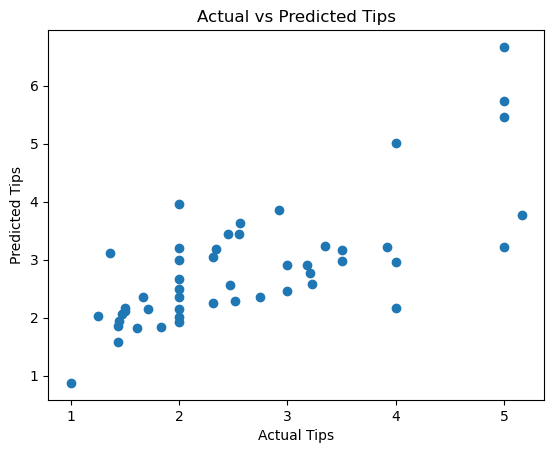

In [28]:
# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Tips")
plt.ylabel("Predicted Tips")
plt.title("Actual vs Predicted Tips")
plt.show()

In [32]:
# Save the trained model using pickle
import pickle
with open("linear_regression_model.pkl", "wb") as file: # write binary
    pickle.dump(model, file)

with open("scaler.pkl", "wb") as file: # write binary
    pickle.dump(scaler, file)

# Happy Learning